In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcY2hyaXNcRG9jdW1lbnRzXEdpdEh1YlxhbWFfd3MyNVxzdWJtaXNzaW9uXGNoYXB0ZXJz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"C:\\Users\\chris\\AppData\\Roaming\\uv\\python\\cpython-3.13.11-windows-x86_64-none\\Lib\\importlib\\_bootstrap.py": 1767881139.7407913, "C:\\Users\\chris\\AppData\\Roaming\\uv\\python\\cpython-3.13.11-windows-x86_64-none\\Lib\\importlib\\_bootstrap_external.py": 1767881139.7407913, "C:\\Users\\chris\\AppData\\Roaming\\uv\\python\\cpython-3.13.11-windows-x86_64-none\\Lib\\zipimport.py": 1767881140.4141226, "C:\\Users\\chris\\AppData\\Roaming\\uv\\python\\cpython-3.13.11-windows-x86_64-none\\Lib\\codecs.py": 1767881139.3928826, "C:\\Users\\chris\\AppData\\Roaming\\uv\\python\\cpython-3.13.11-windows-x86_64-none\\Lib\\encodings\\aliases.py": 1767881139.454839, "C:\\Users\\chris\\AppData\\Roaming\\uv\\python\\cpython-3.13.11-windows-x86_64-none\\Lib\\encodings\\__init__.py": 1767881139.4507902, "C:\\Users\\chris\\AppData\\Roaming\\uv\\python\\cpython-3.13.11-windows-x86_64-none\\Lib\\encodings\\utf_8.py": 1767881139.5054436, "C:\\Users\\chris\\AppData\\Roaming\\uv\\python\\cpython-3.13.

In [2]:
#| label: setup
#| include: false
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

from ama_tlbx.analysis import FeatureGroup
from ama_tlbx.analysis.model_registry import ModelRegistry
from ama_tlbx.data import LECol, LifeExpectancyDataset
from ama_tlbx.plotting import plot_biplot_plotly, plot_loadings_heatmap
from ama_tlbx.utils.plotting_config import DEFAULT_PLOT_CFG

DEFAULT_PLOT_CFG.apply_global()
np.random.seed(42)

TRAIN_YEAR = 2014
HOLDOUT_YEAR = 2011
STATUS_DUMMY = "status_developed"
N_BOOTSTAP = 3000

In [3]:
#| label: data-prep
#| code-fold: true
train_ds = LifeExpectancyDataset.from_csv_updated(
    aggregate_by_country=TRAIN_YEAR,
    resolve_nand_pred="carry_forward",
)
holdout_ds = LifeExpectancyDataset.from_csv_updated(
    aggregate_by_country=HOLDOUT_YEAR,
    resolve_nand_pred="carry_forward",
)

train_full = train_ds.tf_and_norm().drop(columns=[LECol.YEAR])
holdout_full = holdout_ds.tf_and_norm().drop(columns=[LECol.YEAR])

if STATUS_DUMMY not in train_full.columns and LECol.STATUS in train_full.columns:
    train_full = train_full.assign(
        **{STATUS_DUMMY: train_full[LECol.STATUS].astype(int)}
    )
    holdout_full = holdout_full.assign(
        **{STATUS_DUMMY: holdout_full[LECol.STATUS].astype(int)}
    )

registry = ModelRegistry(eval_year=HOLDOUT_YEAR)

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\1999880901.py:1: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\1999880901.py:5: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\1999880901.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.

C:\Users\chris\AppData\Local\Temp\ipykernel_3

In [4]:
#| label: supervised-pca
#| code-fold: false
corr_result = (
    LifeExpectancyDataset(df=train_full)
    .make_correlation_analyzer(standardized=False, include_target=True)
    .fit()
    .result()
)

strong_features = (
    corr_result.target_correlations.assign(abs_cor=lambda d: d.correlation.abs())
    .query("abs_cor > 0.25")
    .feature.tolist()
)
strong_features = [
    f
    for f in strong_features
    if f
    not in [
        LECol.HDI,
    ]
]
print(strong_features)

['gdp', 'schooling', 'status_developed', 'bmi', 'measles', 'percentage_expenditure', 'alcohol', 'total_expenditure', 'hepatitis_b', 'diphtheria', 'thinness_1_19_years', 'polio', 'thinness_5_9_years', 'hiv_aids', 'infant_deaths', 'under_five_deaths', 'adult_mortality']


In [5]:
#| label: tbl-supervised-pca-fit
#| code-fold: true
feature_groups = [FeatureGroup(name="supervised", features=strong_features)]

pca_result = (
    LifeExpectancyDataset(df=train_full)
    .make_pca_dim_reduction_analyzer(
        feature_groups=feature_groups,
        standardized=True,
        min_var_explained=1.0,
    )
    .fit()
    .result()
)

pc_train = pca_result.reduced_df
pc_holdout = pca_result.transform(holdout_full)

train_pca_df = pc_train.assign(**train_full[[LECol.TARGET]])
holdout_pca_df = pc_holdout.assign(**holdout_full[[LECol.TARGET]])

rhs_pca = " + ".join(pc_train.columns.astype(str))
spca_diag = registry.fit(
    train_pca_df,
    name="m_spca",
    rhs=rhs_pca,
)

sig_pcs = [
    term
    for term, pval in spca_diag.model.pvalues.items()
    if term.startswith("supervised_PC") and float(pval) < 0.05
]
if not sig_pcs:
    sig_pcs = pc_train.columns.tolist()

rhs_pca_reduced = " + ".join(sig_pcs)
spca_reduced = registry.fit(
    train_pca_df,
    name="m_spca_reduced",
    rhs=rhs_pca_reduced,
    refit=True,
)
display(spca_reduced)

RegressionResult
------------------------------------------------------------------------
Model      : RegressionResultsWrapper
Observations: 179  |  Params: 15
Formula    : life_expectancy ~ supervised_PC1 + supervised_PC3 + supervised_PC4 + supervised_PC5 + supervised_PC6 + supervised_PC7 + supervised_PC8 + supervised_PC9 + supervised_PC10 + supervised_PC11 + supervised_PC12 + supervised_PC13 + supervised_PC14 + supervised_PC17

Fit metrics:
  r2=0.971 | adj_r2=0.969 | rmse=1.358 | mae=1.039 | mape=0.015
Information criteria:
  aic=647.447 | aicc=650.392 | bic=695.258 | mdl=347.629
Cross-validation: cv_rmse=nan, folds=0
Diagnostics:
  dw=2.187 | jb_p=0.019 | shapiro_p=0.098 | bp_p=0.007 | white_p=0.154 | max_vif=1.000 | max_cooks=0.341

Tip: call print_summary() for the full statsmodels output.

In [6]:
#| label: supervised-pca-stepwise
#| code-fold: false
stepwise_paths, stepwise_best_map, stepwise_compare = registry.run_selection_grid(
    train_pca_df,
    base_terms=[],
    candidates=pc_train.columns.astype(str).tolist(),
    criteria=["aic"],
    thresholds={"aic": 1.0},
    name_prefix="m_stepwise",
    refit=True,
)
spca_stepwise_name = stepwise_best_map.loc[0, "model"]
spca_stepwise = registry.get(spca_stepwise_name).diag
display(spca_stepwise)

RegressionResult
------------------------------------------------------------------------
Model      : RegressionResultsWrapper
Observations: 179  |  Params: 16
Formula    : life_expectancy ~ supervised_PC1 + supervised_PC3 + supervised_PC10 + supervised_PC4 + supervised_PC8 + supervised_PC5 + supervised_PC11 + supervised_PC14 + supervised_PC13 + supervised_PC6 + supervised_PC17 + supervised_PC9 + supervised_PC7 + supervised_PC12 + supervised_PC2

Fit metrics:
  r2=0.972 | adj_r2=0.970 | rmse=1.342 | mae=1.023 | mape=0.015
Information criteria:
  aic=645.300 | aicc=648.658 | bic=696.299 | mdl=348.149
Cross-validation: cv_rmse=nan, folds=0
Diagnostics:
  dw=2.153 | jb_p=0.003 | shapiro_p=0.079 | bp_p=0.004 | white_p=0.174 | max_vif=1.000 | max_cooks=0.379

Tip: call print_summary() for the full statsmodels output.

In [7]:
#| label: supervised-pca-interactions
#| code-fold: true
import statsmodels.formula.api as smf
from itertools import combinations

top_k = 6
tvals = spca_reduced.model.tvalues.drop("Intercept").abs().sort_values(ascending=False)
top_pcs = tvals.head(top_k).index.tolist()

base_rhs = rhs_pca_reduced
base_aic = spca_reduced.metrics.aic
screen_rows = []
for pc_a, pc_b in combinations(top_pcs, 2):
    term = f"{pc_a}:{pc_b}"
    rhs = f"{base_rhs} + {term}"
    model = smf.ols(f"{LECol.TARGET} ~ {rhs}", data=train_pca_df).fit()
    screen_rows.append(
        {
            "term": term,
            "pval": float(model.pvalues.get(term, np.nan)),
            "delta_aic": float(model.aic - base_aic),
        }
    )

screen_df = pd.DataFrame(screen_rows).sort_values("delta_aic")
interaction_candidates = (
    screen_df.query("pval < 0.05 and delta_aic < 0").head(5)["term"].tolist()
)
if not interaction_candidates:
    interaction_candidates = screen_df.head(3)["term"].tolist()

interaction_paths, interaction_best_map, interaction_compare = (
    registry.run_selection_grid(
        train_pca_df,
        base_terms=sig_pcs,
        candidates=interaction_candidates,
        directions=["stepwise"],
        criteria=["aic"],
        thresholds={"aic": 1.0},
        name_prefix="m_inter",
        refit=True,
    )
)
spca_interactions_name = interaction_best_map.loc[0, "model"]
spca_interactions = registry.get(spca_interactions_name).diag
display(spca_interactions)

RegressionResult
------------------------------------------------------------------------
Model      : RegressionResultsWrapper
Observations: 179  |  Params: 18
Formula    : life_expectancy ~ supervised_PC1 + supervised_PC3 + supervised_PC4 + supervised_PC5 + supervised_PC6 + supervised_PC7 + supervised_PC8 + supervised_PC9 + supervised_PC10 + supervised_PC11 + supervised_PC12 + supervised_PC13 + supervised_PC14 + supervised_PC17 + supervised_PC3:supervised_PC4 + supervised_PC3:supervised_PC10 + supervised_PC10:supervised_PC4

Fit metrics:
  r2=0.975 | adj_r2=0.973 | rmse=1.265 | mae=1.010 | mape=0.015
Information criteria:
  aic=628.022 | aicc=632.297 | bic=685.395 | mdl=342.697
Cross-validation: cv_rmse=nan, folds=0
Diagnostics:
  dw=2.218 | jb_p=0.747 | shapiro_p=0.577 | bp_p=0.036 | white_p=0.306 | max_vif=1.875 | max_cooks=0.417

Tip: call print_summary() for the full statsmodels output.

In [8]:
#| label: supervised-pca-cooks
#| code-fold: true
cooks_thresh = 4 / len(train_pca_df)
spca_cooks_initial, spca_cooks = registry.fit(
    train_pca_df,
    name="m_inter_trim",
    rhs=registry.get(spca_interactions_name).rhs,
    refit=True,
    cook_distance_threshold=cooks_thresh,
)
registry.remove("m_inter_trim_initial")  # keep only final trimmed model in registry
removed = len(spca_cooks_initial.design_matrix) - len(spca_cooks.design_matrix)
print(f"Cook's threshold: {cooks_thresh:.4f} | removed: {removed}")
display(spca_cooks_initial)

Cook's threshold: 0.0223 | removed: 12


RegressionResult
------------------------------------------------------------------------
Model      : RegressionResultsWrapper
Observations: 179  |  Params: 18
Formula    : life_expectancy ~ supervised_PC1 + supervised_PC3 + supervised_PC4 + supervised_PC5 + supervised_PC6 + supervised_PC7 + supervised_PC8 + supervised_PC9 + supervised_PC10 + supervised_PC11 + supervised_PC12 + supervised_PC13 + supervised_PC14 + supervised_PC17 + supervised_PC3:supervised_PC4 + supervised_PC3:supervised_PC10 + supervised_PC10:supervised_PC4

Fit metrics:
  r2=0.975 | adj_r2=0.973 | rmse=1.265 | mae=1.010 | mape=0.015
Information criteria:
  aic=628.022 | aicc=632.297 | bic=685.395 | mdl=342.697
Cross-validation: cv_rmse=nan, folds=0
Diagnostics:
  dw=2.218 | jb_p=0.747 | shapiro_p=0.577 | bp_p=0.036 | white_p=0.306 | max_vif=1.875 | max_cooks=0.417

Tip: call print_summary() for the full statsmodels output.

In [9]:
final_formula = (
    registry.get(spca_interactions_name)
    .rhs.replace(" + supervised_PC12", "")
    .replace(" + supervised_PC3:supervised_PC10", "")
)
cooks_thresh = 4 / len(train_pca_df)
spca_cooks_initial, spca_final = registry.fit(
    train_pca_df,
    name="m_final",
    rhs=final_formula,
    refit=True,
    cook_distance_threshold=cooks_thresh,
)
registry.remove("m_final_initial")  # keep only final trimmed model in registry
removed = len(spca_cooks_initial.design_matrix) - len(spca_final.design_matrix)

In [10]:
#| label: supervised-pca-compare
#| tbl-cap: Model comparison across supervised PCA variants.
comp_tbl = registry.compare(sort_by="aic").drop(columns=["rhs"])[
    ["aic", "rmse", "r2", "adj_r2", "n_obs"]
]
comp_tbl

,aic,rmse,r2,adj_r2,n_obs
model,,,,,
m_final,533.222196,1.066058,0.981073,0.979217,169.0
m_inter_trim,535.063167,1.078167,0.981232,0.979091,167.0
m_inter_stepwise_aic,628.022024,1.264598,0.975216,0.972599,179.0
m_stepwise_backward_aic,645.300454,1.342041,0.972087,0.969519,179.0
m_stepwise_forward_aic,645.300454,1.342041,0.972087,0.969519,179.0
m_stepwise_stepwise_aic,645.300454,1.342041,0.972087,0.969519,179.0
m_spca_reduced,647.447484,1.357677,0.971433,0.968995,179.0
m_spca,648.844550,1.340333,0.972158,0.969219,179.0


In [11]:
#| label: supervised-pca-cooks-final
best_model = registry.get(comp_tbl.index[0])
best_model_name = best_model.name
best_model = best_model.diag

display(best_model)

RegressionResult
------------------------------------------------------------------------
Model      : RegressionResultsWrapper
Observations: 169  |  Params: 16
Formula    : life_expectancy ~ supervised_PC1 + supervised_PC3 + supervised_PC4 + supervised_PC5 + supervised_PC6 + supervised_PC7 + supervised_PC8 + supervised_PC9 + supervised_PC10 + supervised_PC11 + supervised_PC13 + supervised_PC14 + supervised_PC17 + supervised_PC3:supervised_PC4 + supervised_PC10:supervised_PC4

Fit metrics:
  r2=0.981 | adj_r2=0.979 | rmse=1.066 | mae=0.866 | mape=0.012
Information criteria:
  aic=533.222 | aicc=536.801 | bic=583.301 | mdl=291.650
Cross-validation: cv_rmse=nan, folds=0
Diagnostics:
  dw=1.989 | jb_p=0.560 | shapiro_p=0.774 | bp_p=0.048 | white_p=0.529 | max_vif=1.705 | max_cooks=0.056

Tip: call print_summary() for the full statsmodels output.

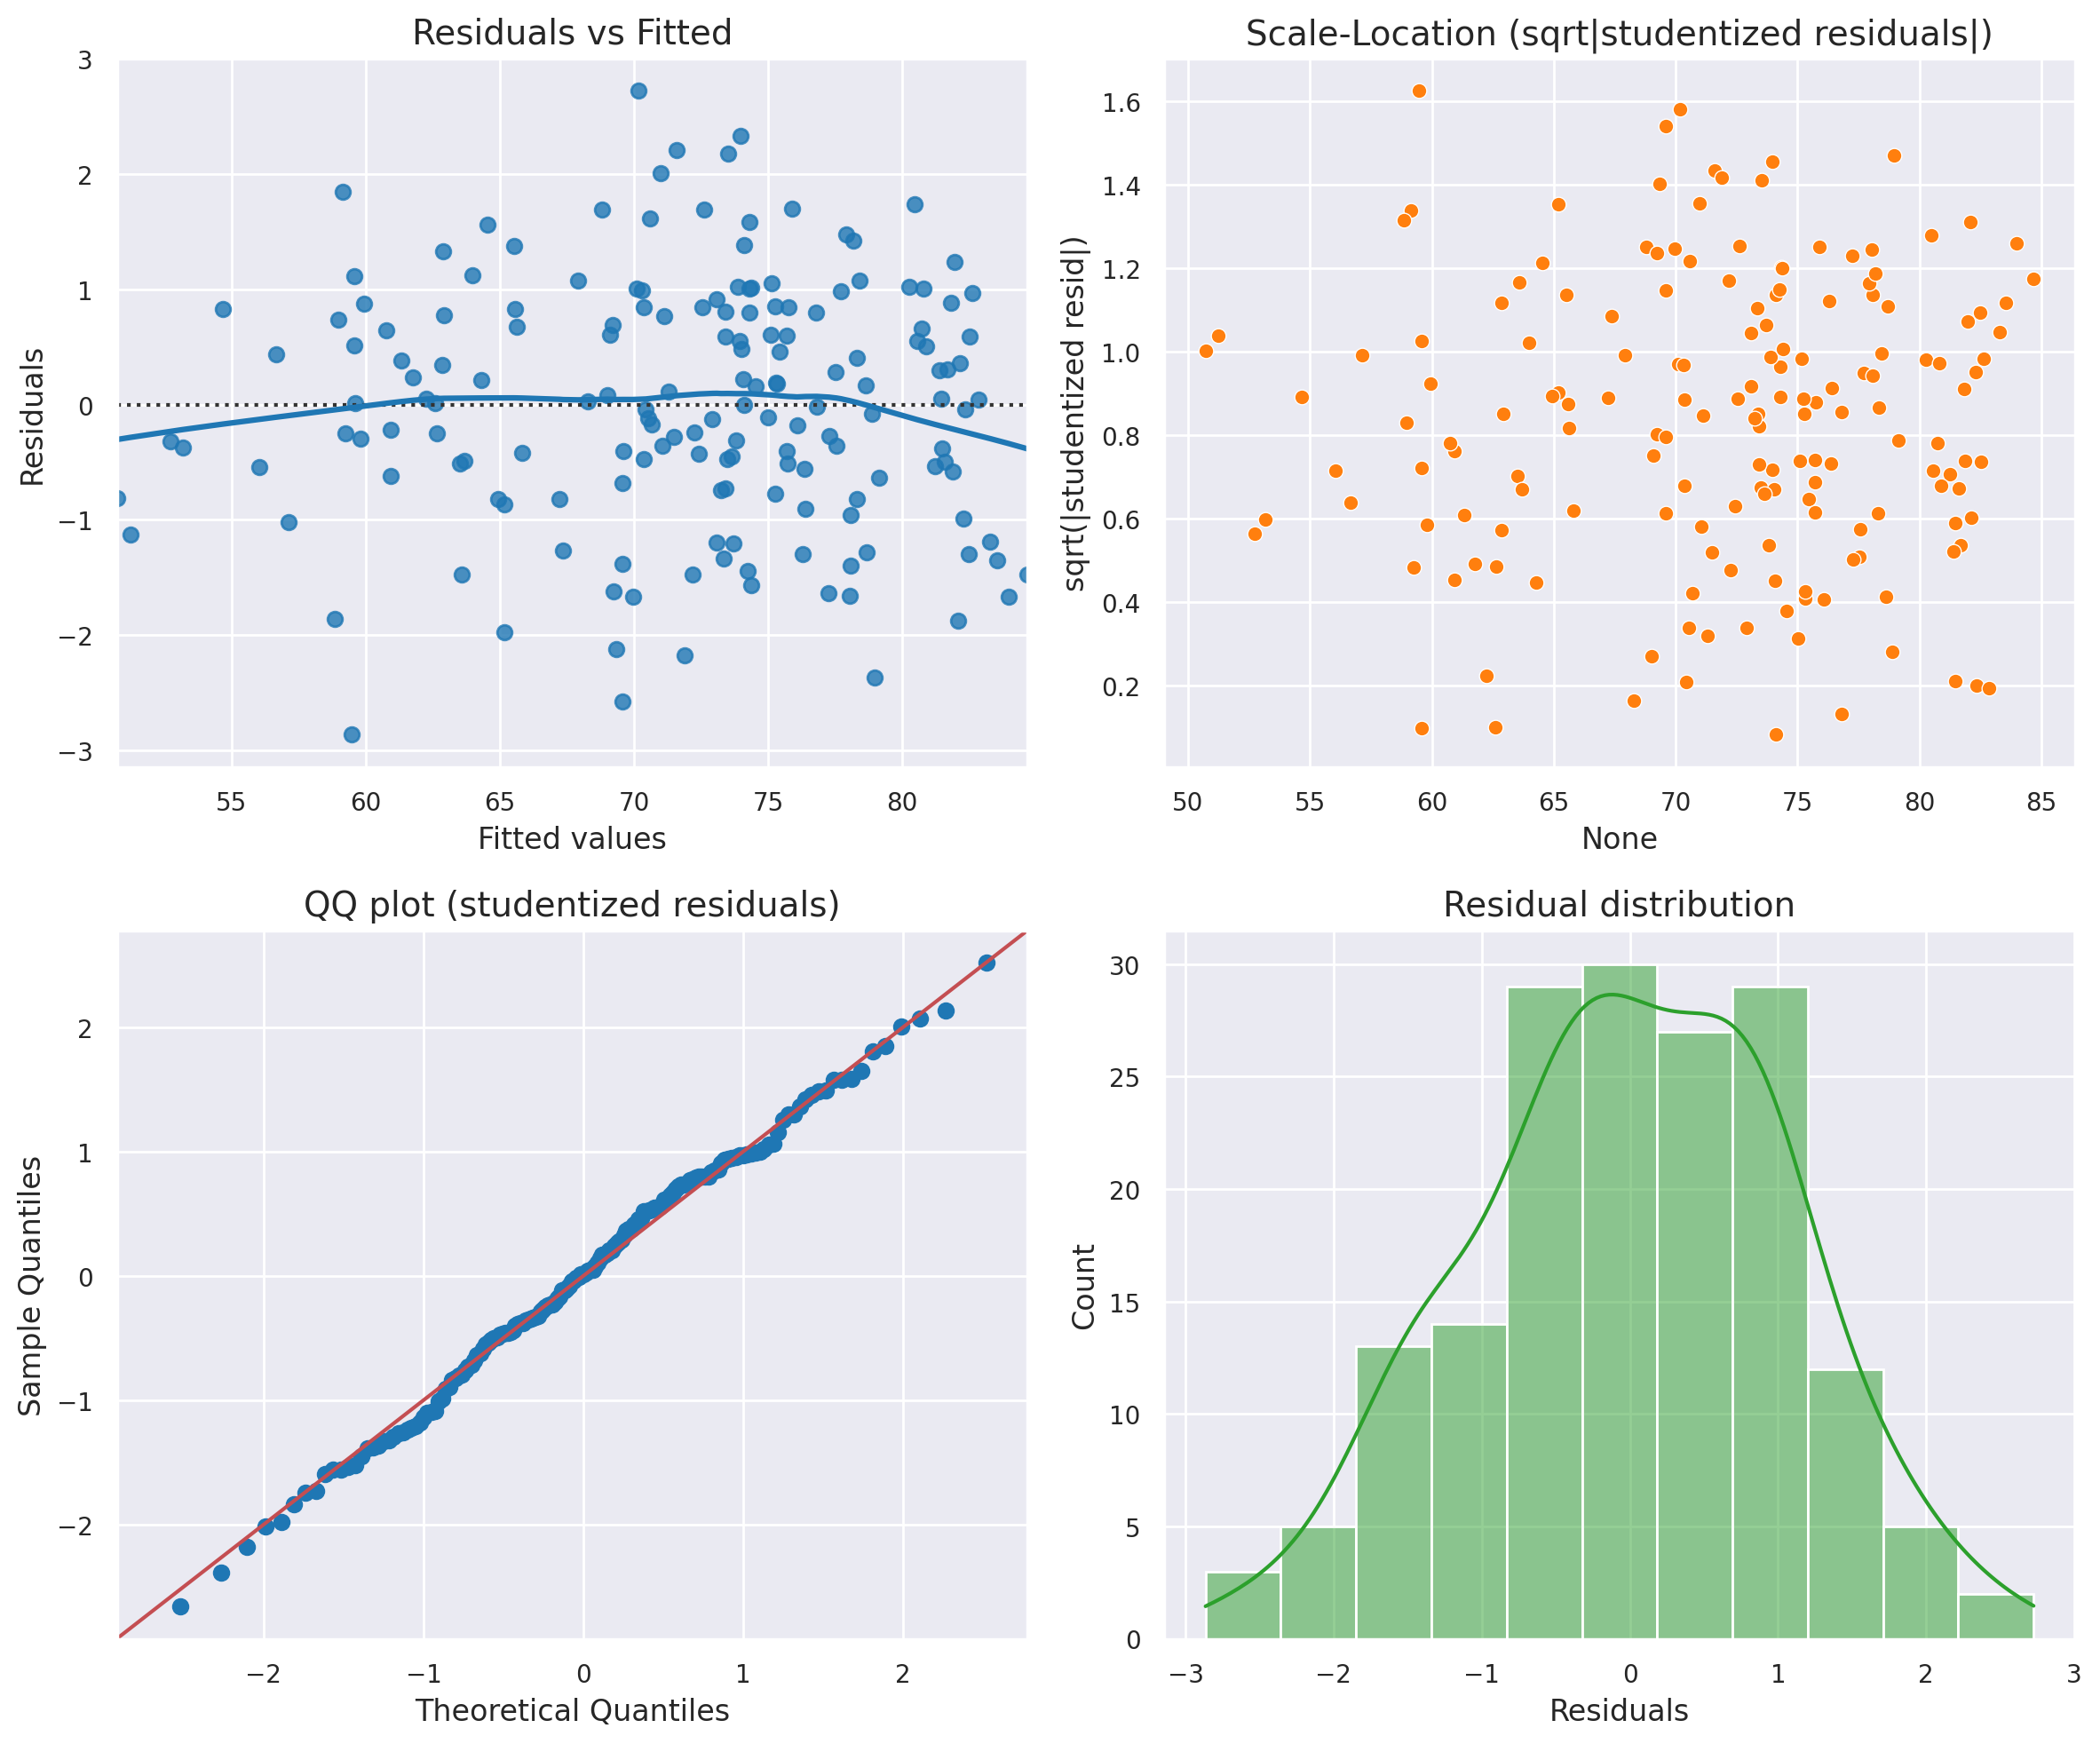

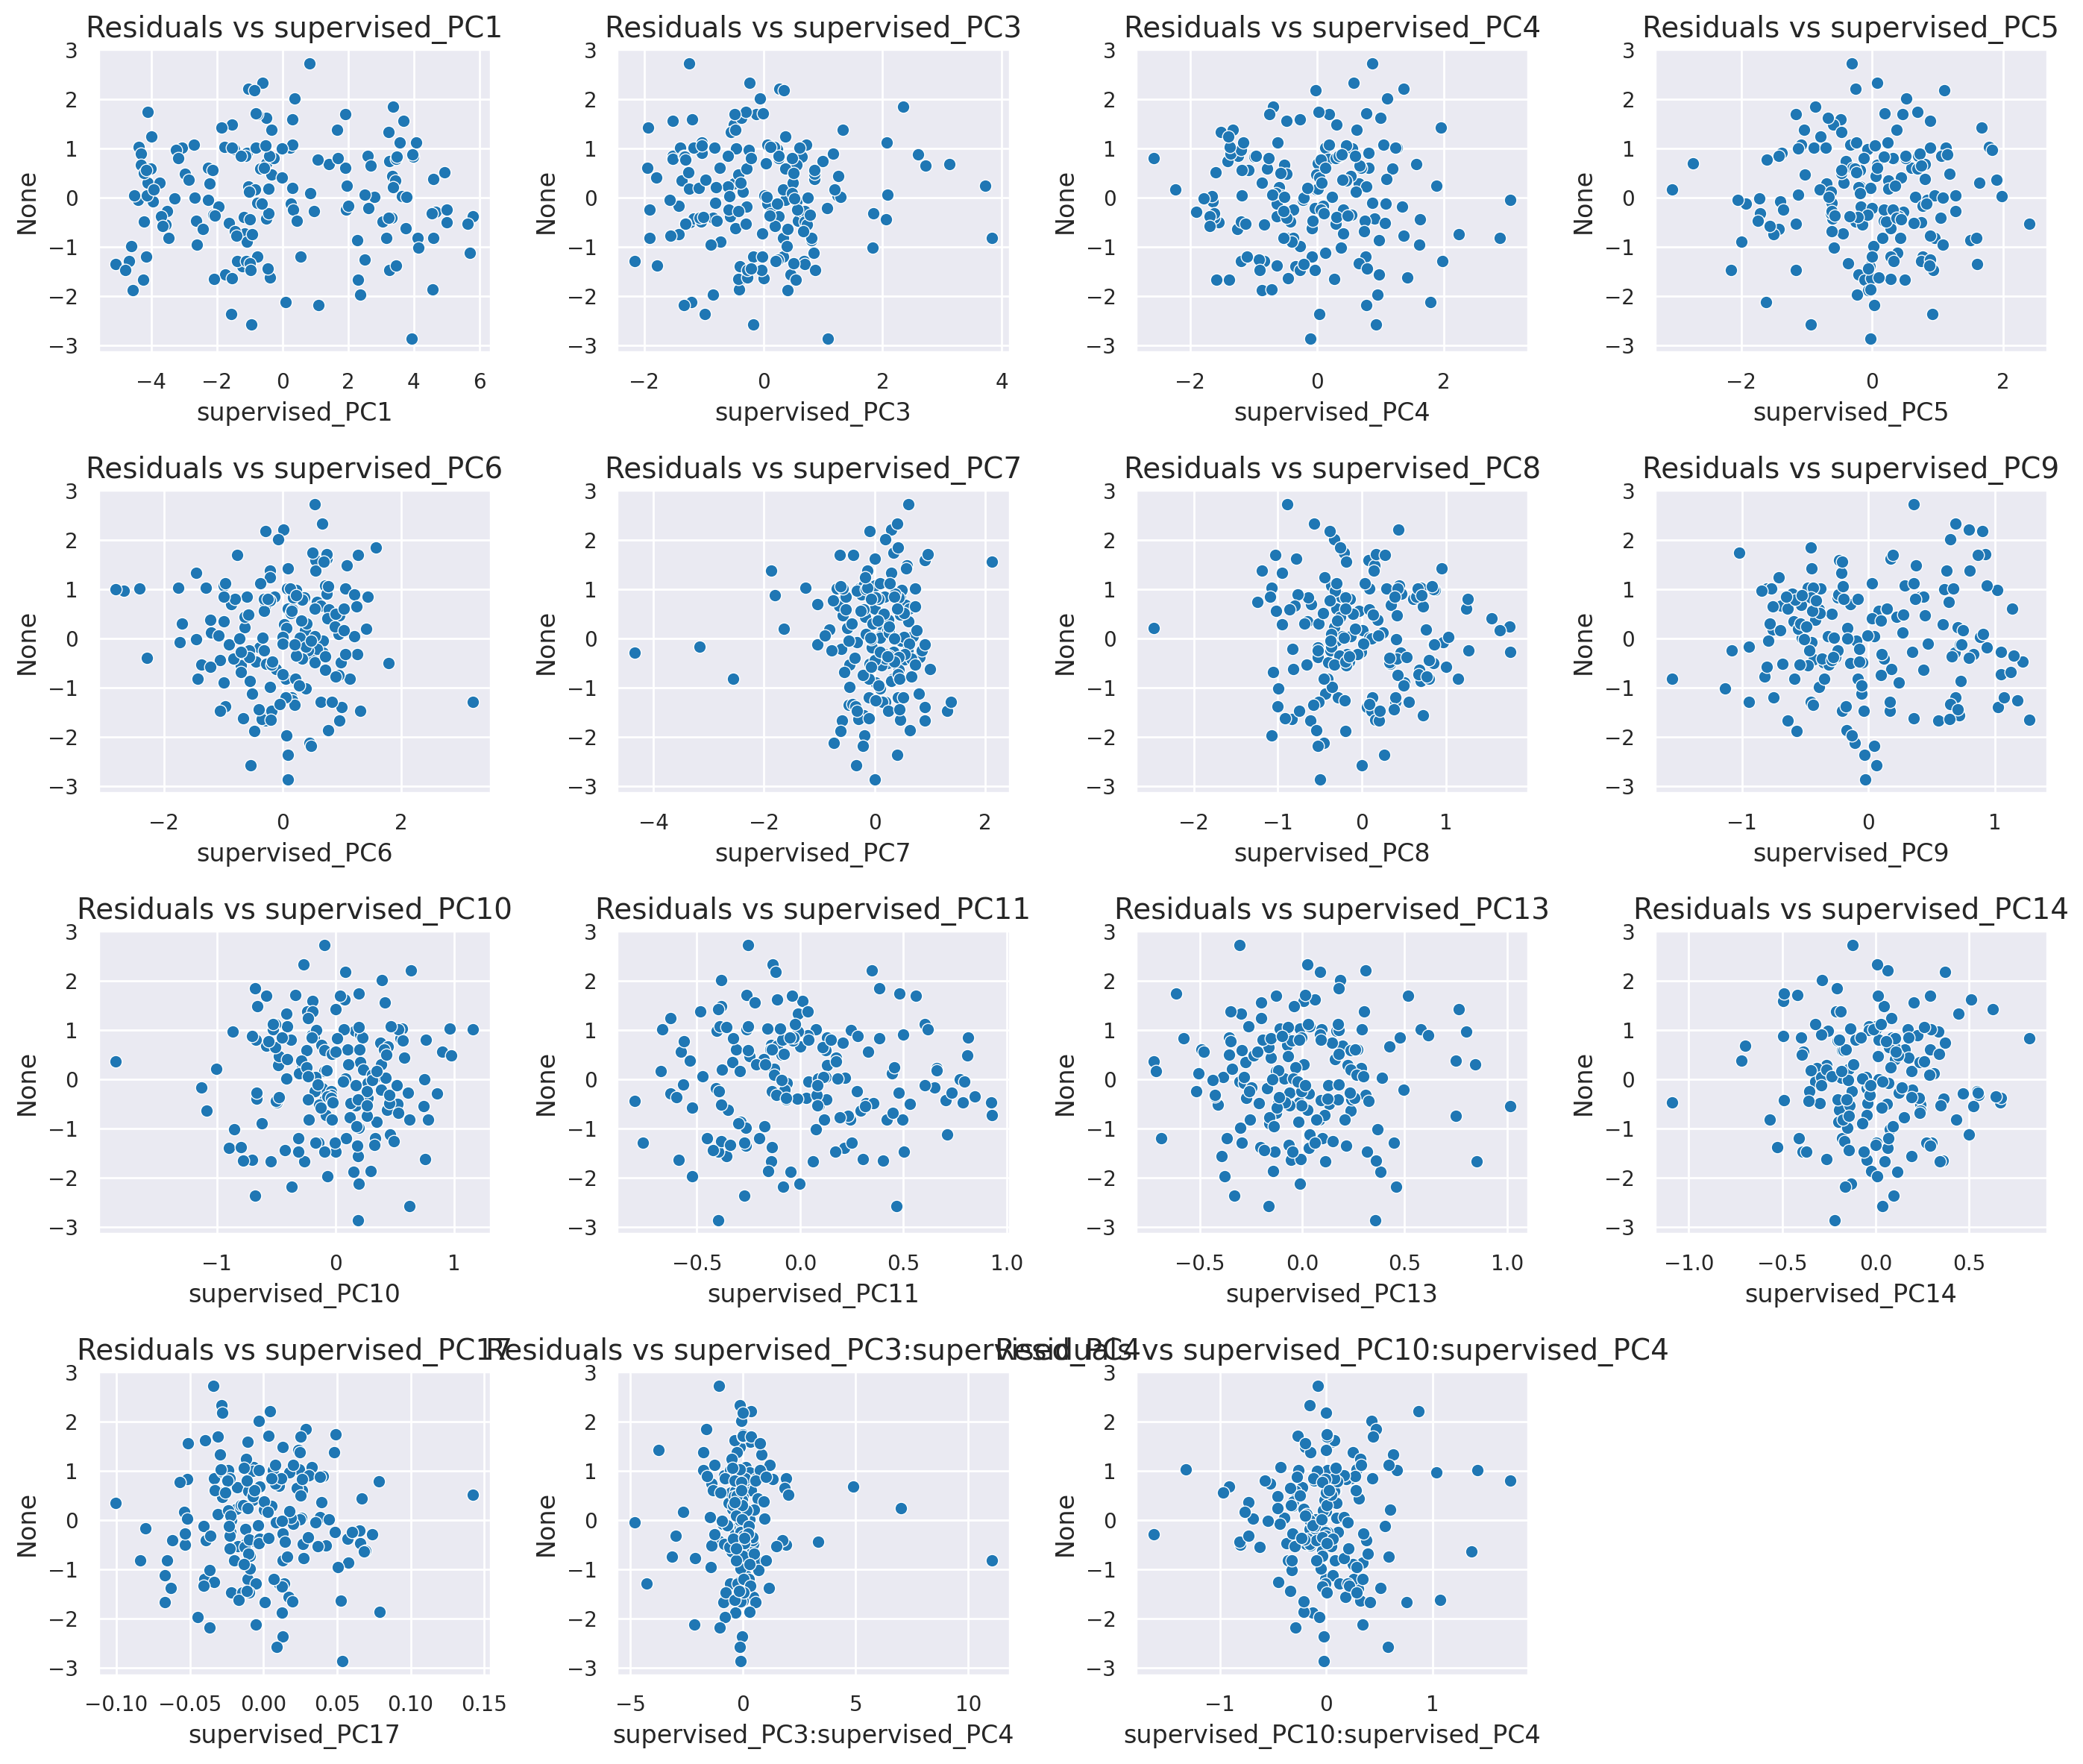

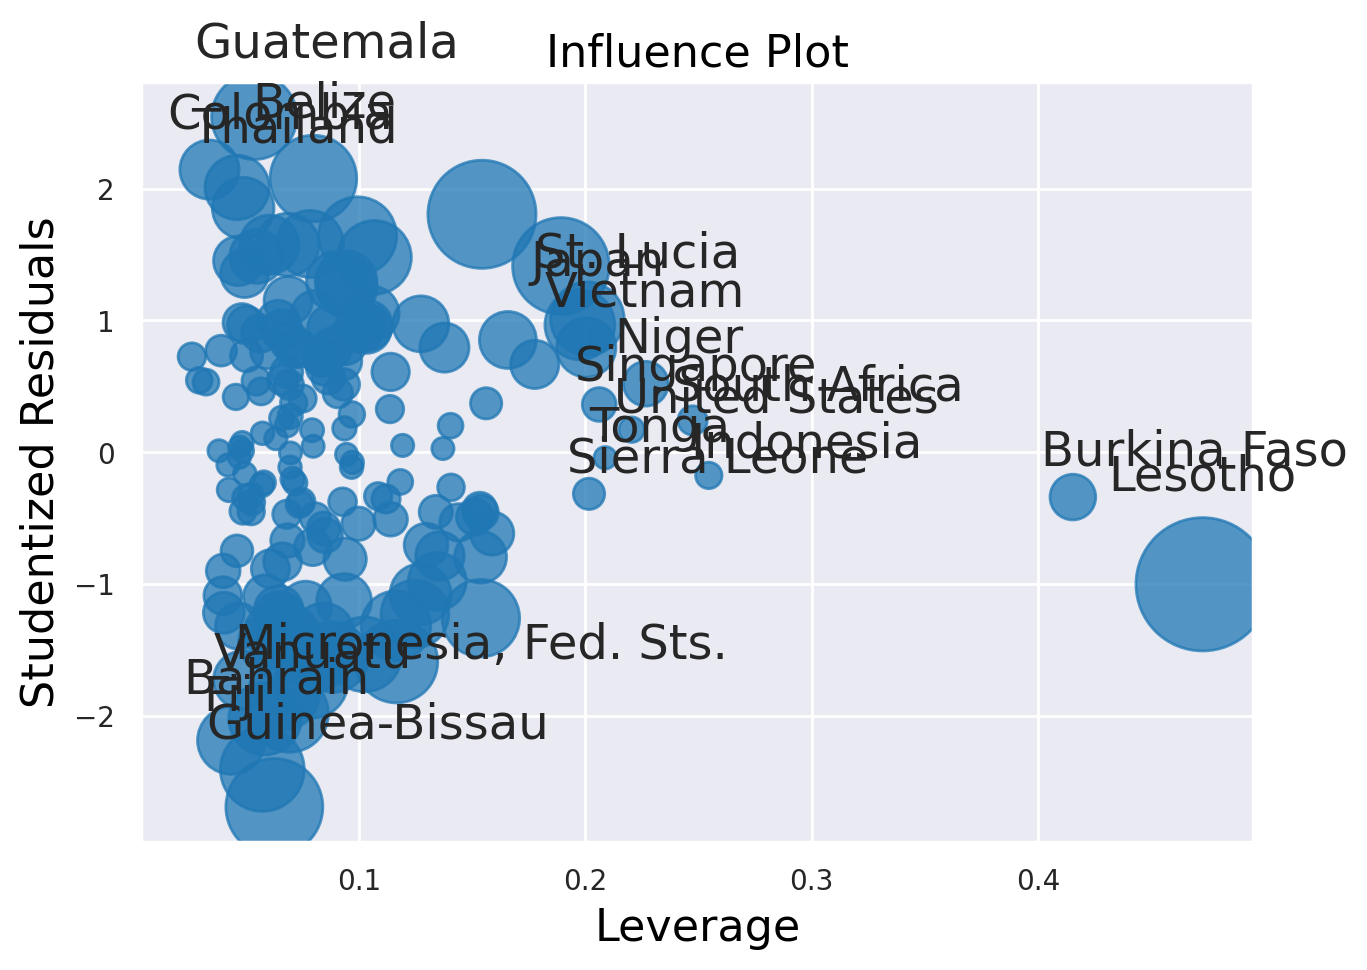

In [12]:
#| label: supervised-pca-diagnostics
#| fig-cap: Supervised PCA regression diagnostics.
best_model.plot_residual_diags()
plt.show()

In [13]:
#| label: supervised-pca-eval
#| tbl-cap: Holdout-year performance (2011) for supervised PCA model.
eval_holdout = registry.evaluate_on(
    best_model_name,
    holdout_pca_df,
    label=f"year{HOLDOUT_YEAR}",
)
eval_holdout

label,year2011
n_obs,179
rmse,1.924
mae,1.455
r2,0.950


In [14]:
#| label: supervised-pca-eval-ci
#| tbl-cap: Bootstrap CIs for holdout metrics (B=3000).
eval_holdout.bootstrap_ci(n_bootstrap=N_BOOTSTAP, random_state=42)

,metric,estimate,ci_low,ci_high
0,rmse,1.924490,1.647555,2.215461
1,mae,1.455492,1.284219,1.652197
2,r2,0.950158,0.936130,0.961521


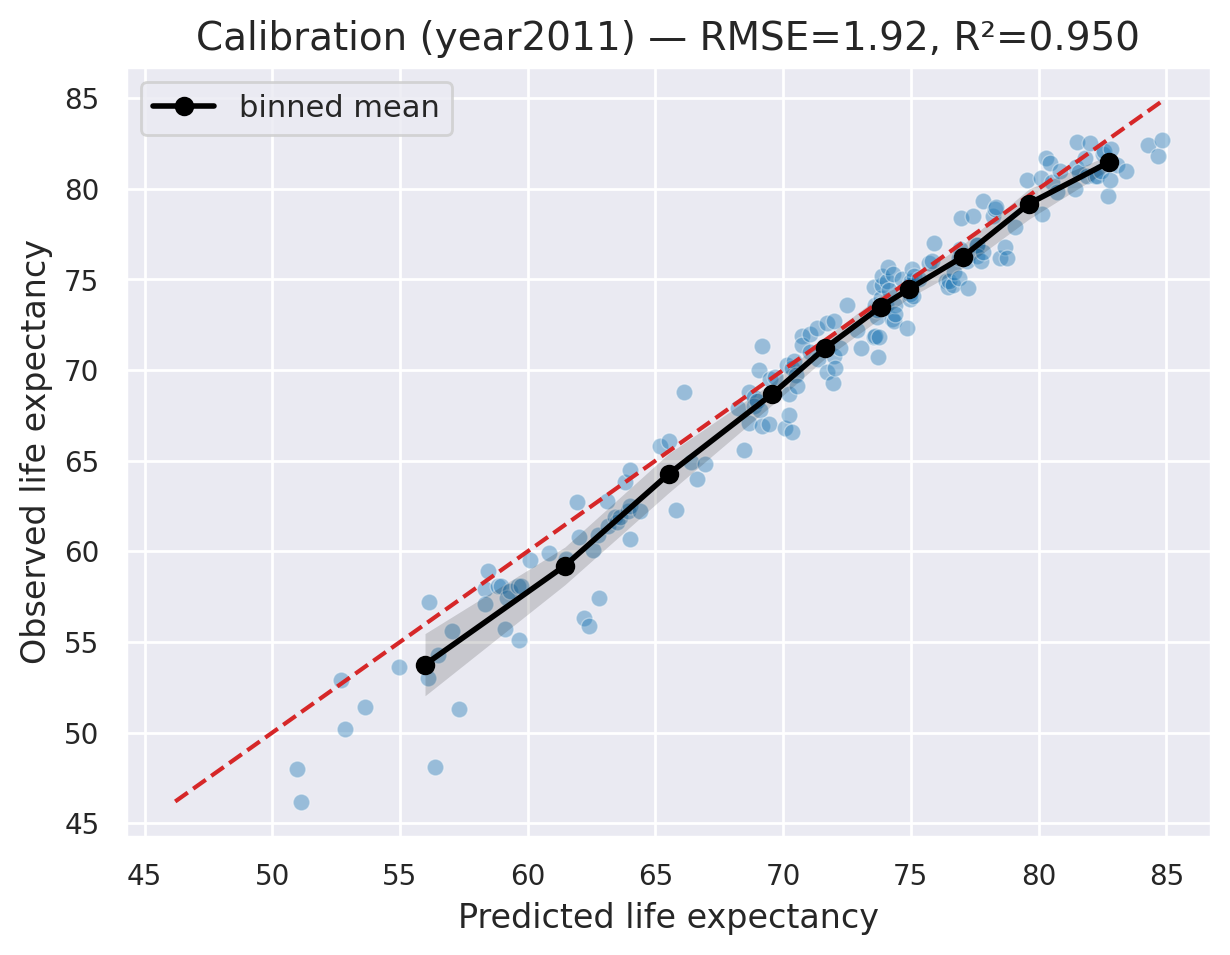

In [15]:
#| label: supervised-pca-calibration
#| fig-cap: Holdout calibration (2011) with bootstrap 95% CIs for binned means.
plt.figure(figsize=(7, 5))
eval_holdout.plot_calibration(bins=10, bootstrap=N_BOOTSTAP, random_state=42)
plt.show()

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:6: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.



C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:6: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.



C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:6: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.



C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:6: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.



C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:6: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.



C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:6: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.



C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:6: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.



C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:6: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.



C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:6: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.



C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:6: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.



C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:6: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.



C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:6: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.



C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:6: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.



C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:6: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.



C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:6: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3180612396.py:10: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.



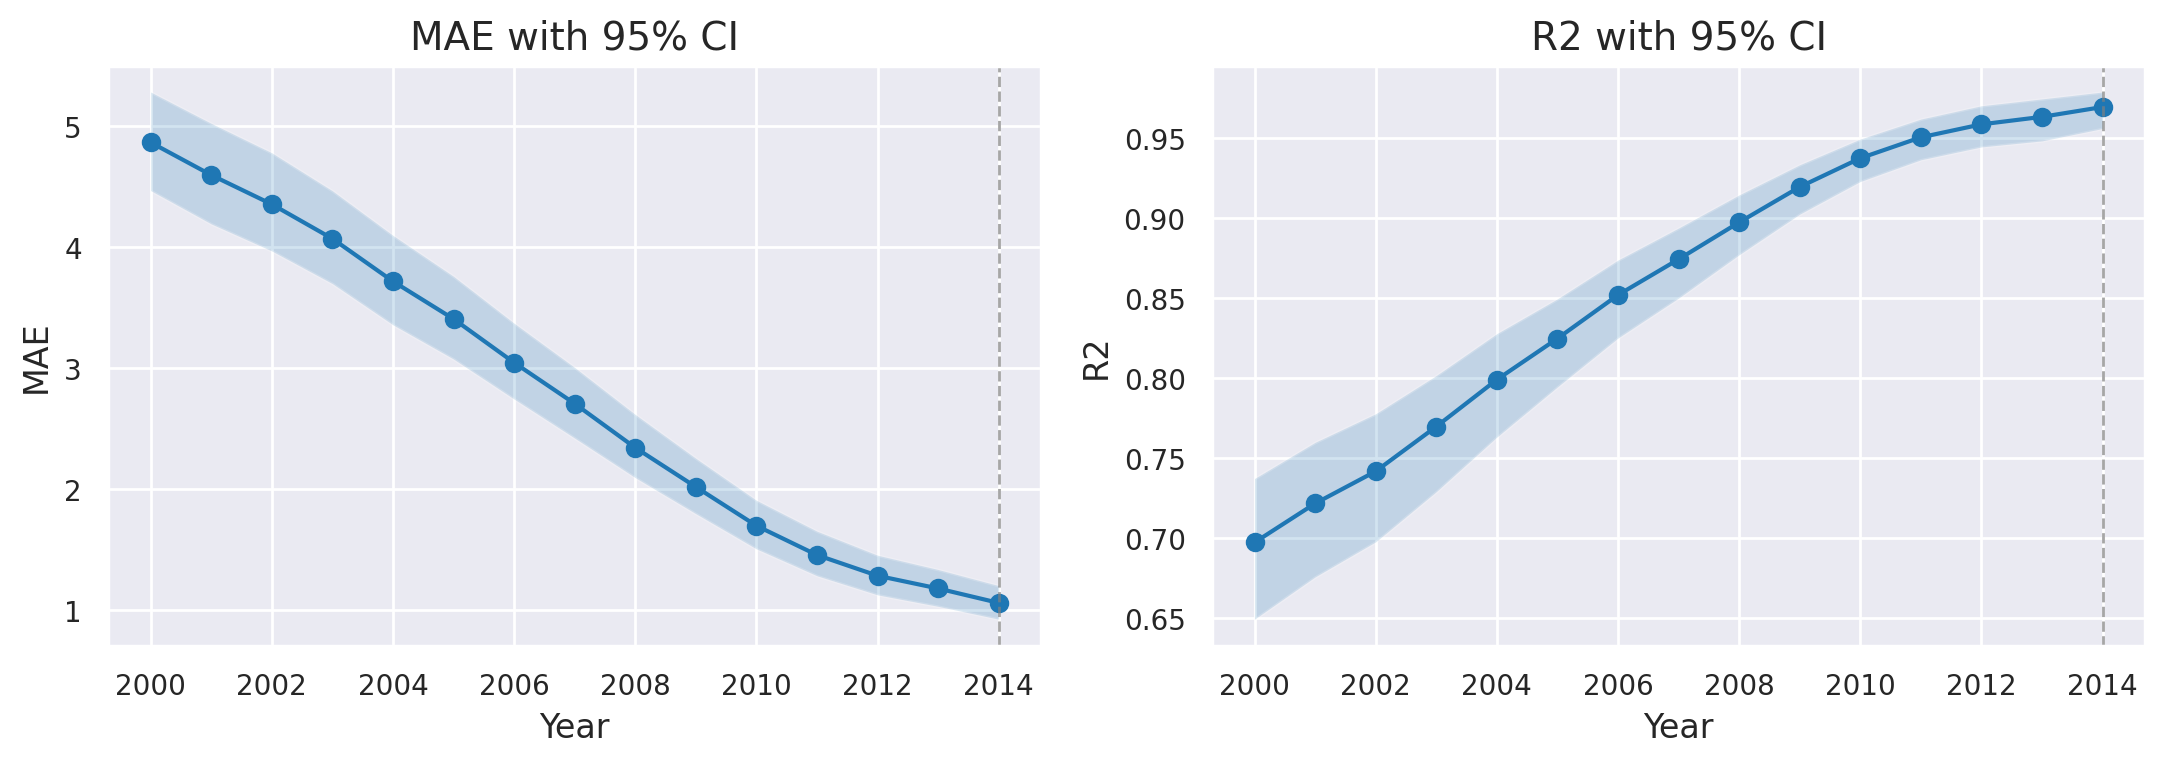

,year,rmse,mae,r2,n_obs
0,2000,5.585389,4.864429,0.697255,179.0
1,2001,5.369155,4.594871,0.721600,179.0
2,2002,5.143582,4.353308,0.741657,179.0
3,2003,4.818879,4.069208,0.769588,179.0
4,2004,4.482345,3.716698,0.798862,179.0
5,2005,4.124402,3.405854,0.824545,179.0
6,2006,3.726467,3.044984,0.851723,179.0
7,2007,3.361198,2.706060,0.874020,179.0
8,2008,2.969387,2.342010,0.897077,179.0
9,2009,2.567156,2.018033,0.919161,179.0


In [16]:
#| label: supervised-pca-eval-years
#| tbl-cap: Supervised PCA evaluation across multiple years (same PCA mapping).
# years_eval = [2010, 2011, 2012, 2013, 2014]
years_eval = range(2000, 2015)
rows = []
ci_rows = []
for year in years_eval:
    yr_ds = LifeExpectancyDataset.from_csv_updated(
        aggregate_by_country=year,
        resolve_nand_pred="carry_forward",
    )
    yr_full = yr_ds.tf_and_norm().drop(columns=[LECol.YEAR])
    if STATUS_DUMMY not in yr_full.columns and LECol.STATUS in yr_full.columns:
        yr_full = yr_full.assign(**{STATUS_DUMMY: yr_full[LECol.STATUS].astype(int)})
    yr_pca = pca_result.transform(yr_full)
    yr_df = yr_pca.assign(**yr_full[[LECol.TARGET]])
    metrics = registry.evaluate_on(best_model_name, yr_df, label=f"year{year}")
    rows.append(
        {
            "year": year,
            "rmse": metrics.rmse,
            "mae": metrics.mae,
            "r2": metrics.r2,
            "n_obs": metrics.n_obs,
        }
    )
    ci = metrics.bootstrap_ci(n_bootstrap=N_BOOTSTAP, random_state=42)
    ci_rows.append(ci.assign(year=year))

metrics_df = pd.DataFrame(rows).sort_values(by="year")
ci_df = pd.concat(ci_rows, ignore_index=True)

plot_df = ci_df.query("metric in ['mae', 'r2']").sort_values(["metric", "year"])
fig, axes = plt.subplots(1, 2, figsize=(11, 4), sharex=True)
for metric, ax in zip(["mae", "r2"], axes):
    sub = plot_df[plot_df["metric"] == metric]
    ax.plot(sub["year"], sub["estimate"], marker="o")
    ax.fill_between(sub["year"], sub["ci_low"], sub["ci_high"], alpha=0.2)
    ax.axvline(TRAIN_YEAR, color="grey", linestyle="--", linewidth=1, alpha=0.7)
    ax.set_title(f"{metric.upper()} with 95% CI")
    ax.set_xlabel("Year")
    ax.set_ylabel(metric.upper())
plt.tight_layout()
plt.show()

metrics_df

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:2: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:24: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:28: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.

C:\Users\chris\AppData\Local\Temp\ipykernel_

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:24: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:28: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:24: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:24: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:28: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:24: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:28: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:24: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:28: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:24: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\l

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:24: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:28: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:24: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:24: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:28: UserWarning:

tf_and_norm(): median-filled missing numeric values before standardization.

C:\Users\chris\AppData\Local\Temp\ipykernel_37956\3783674728.py:24: UserWarning:

from_csv_updated(): mapping incidents_hiv (HIV incidence) to hiv_aids for schema compatibility; semantics differ from HIV/AIDS deaths.

C:\Users\chris\Documents\GitHub\ama_ws25\ama_tlbx\ama_tlbx\data\life_expectancy_dataset.py:299: UserWarning:

from_csv(): drop_missing_target=False may lead to unexpected results 

C:\Users\chris\AppData\Local\Temp\ipykernel

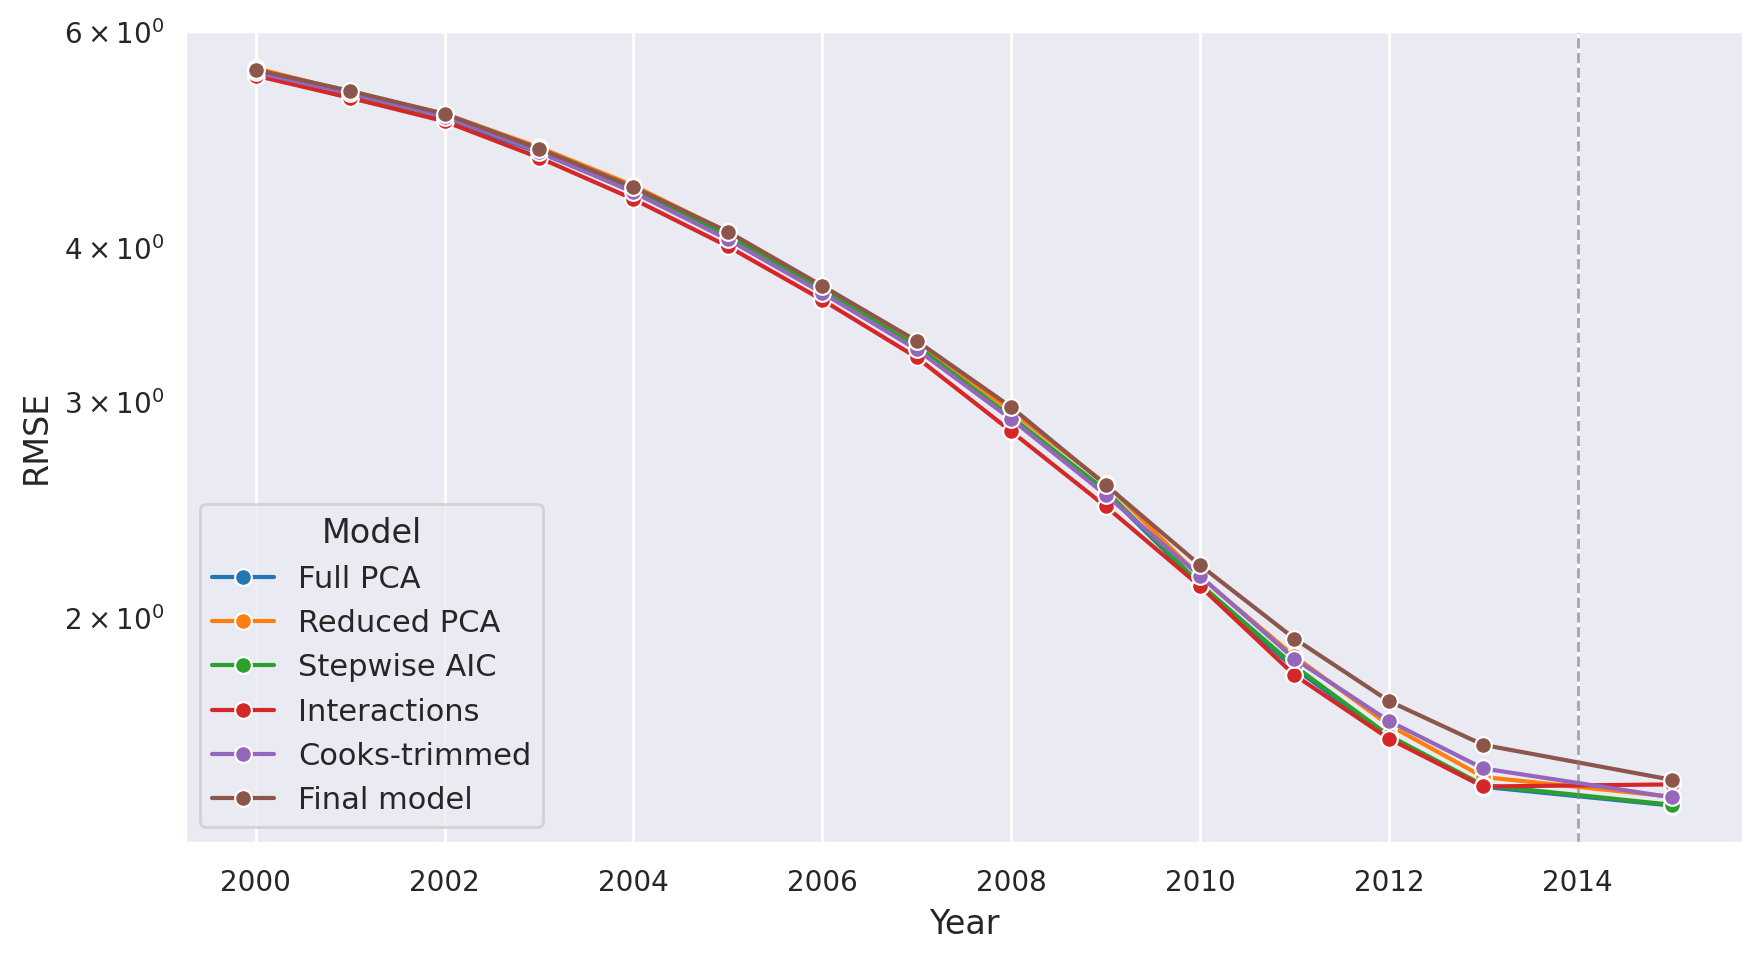

In [17]:
#| label: supervised-pca-eval-all-models
#| fig-cap: RMSE across years for supervised PCA variants.
all_years = (
    LifeExpectancyDataset.from_csv_updated(
        aggregate_by_country=False,
        resolve_nand_pred=False,
    )
    .df[LECol.YEAR]
    .dt.year.sort_values()
    .unique()
    .tolist()
)
years_eval_all = [year for year in all_years if year != TRAIN_YEAR]

model_labels = {
    "m_spca": "Full PCA",
    "m_spca_reduced": "Reduced PCA",
    spca_stepwise_name: "Stepwise AIC",
    spca_interactions_name: "Interactions",
    "m_inter_trim": "Cooks-trimmed",
    "m_final": "Final model",
}

rows = []
for year in years_eval_all:
    yr_ds = LifeExpectancyDataset.from_csv_updated(
        aggregate_by_country=year,
        resolve_nand_pred="carry_forward",
    )
    yr_full = yr_ds.tf_and_norm().drop(columns=[LECol.YEAR])
    if STATUS_DUMMY not in yr_full.columns and LECol.STATUS in yr_full.columns:
        yr_full = yr_full.assign(**{STATUS_DUMMY: yr_full[LECol.STATUS].astype(int)})
    yr_pca = pca_result.transform(yr_full)
    yr_df = yr_pca.assign(**yr_full[[LECol.TARGET]])
    for model in model_labels.keys():
        metrics = registry.evaluate_on(model, yr_df, label=f"year{year}")
        rows.append(
            {
                "year": year,
                "model": model_labels.get(model, model),
                "rmse": metrics.rmse,
                "mae": metrics.mae,
                "r2": metrics.r2,
                "n_obs": metrics.n_obs,
            }
        )

rmse_by_year = pd.DataFrame(rows)
plt.figure(figsize=(9, 5))
sns.lineplot(data=rmse_by_year, x="year", y="rmse", hue="model", marker="o")
plt.axvline(TRAIN_YEAR, color="grey", linestyle="--", linewidth=1, alpha=0.7)
plt.ylabel("RMSE")
plt.yscale("log")
plt.xlabel("Year")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

In [18]:
#| label: tbl-supervised-pca-eval-all-models
#| tbl-cap: Supervised PCA model evaluation across years accumulated over years.

rmse_by_year.groupby("model")[["rmse", "mae", "r2"]].mean().sort_values("rmse")

,rmse,mae,r2
model,,,
Interactions,3.310865,2.790506,0.864511
Full PCA,3.340858,2.745832,0.862052
Stepwise AIC,3.350952,2.748243,0.861214
Cooks-trimmed,3.355227,2.787410,0.861180
Reduced PCA,3.381948,2.758282,0.858855
Final model,3.403130,2.793169,0.857878


C:\Users\chris\AppData\Local\Temp\ipykernel_37956\996434413.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



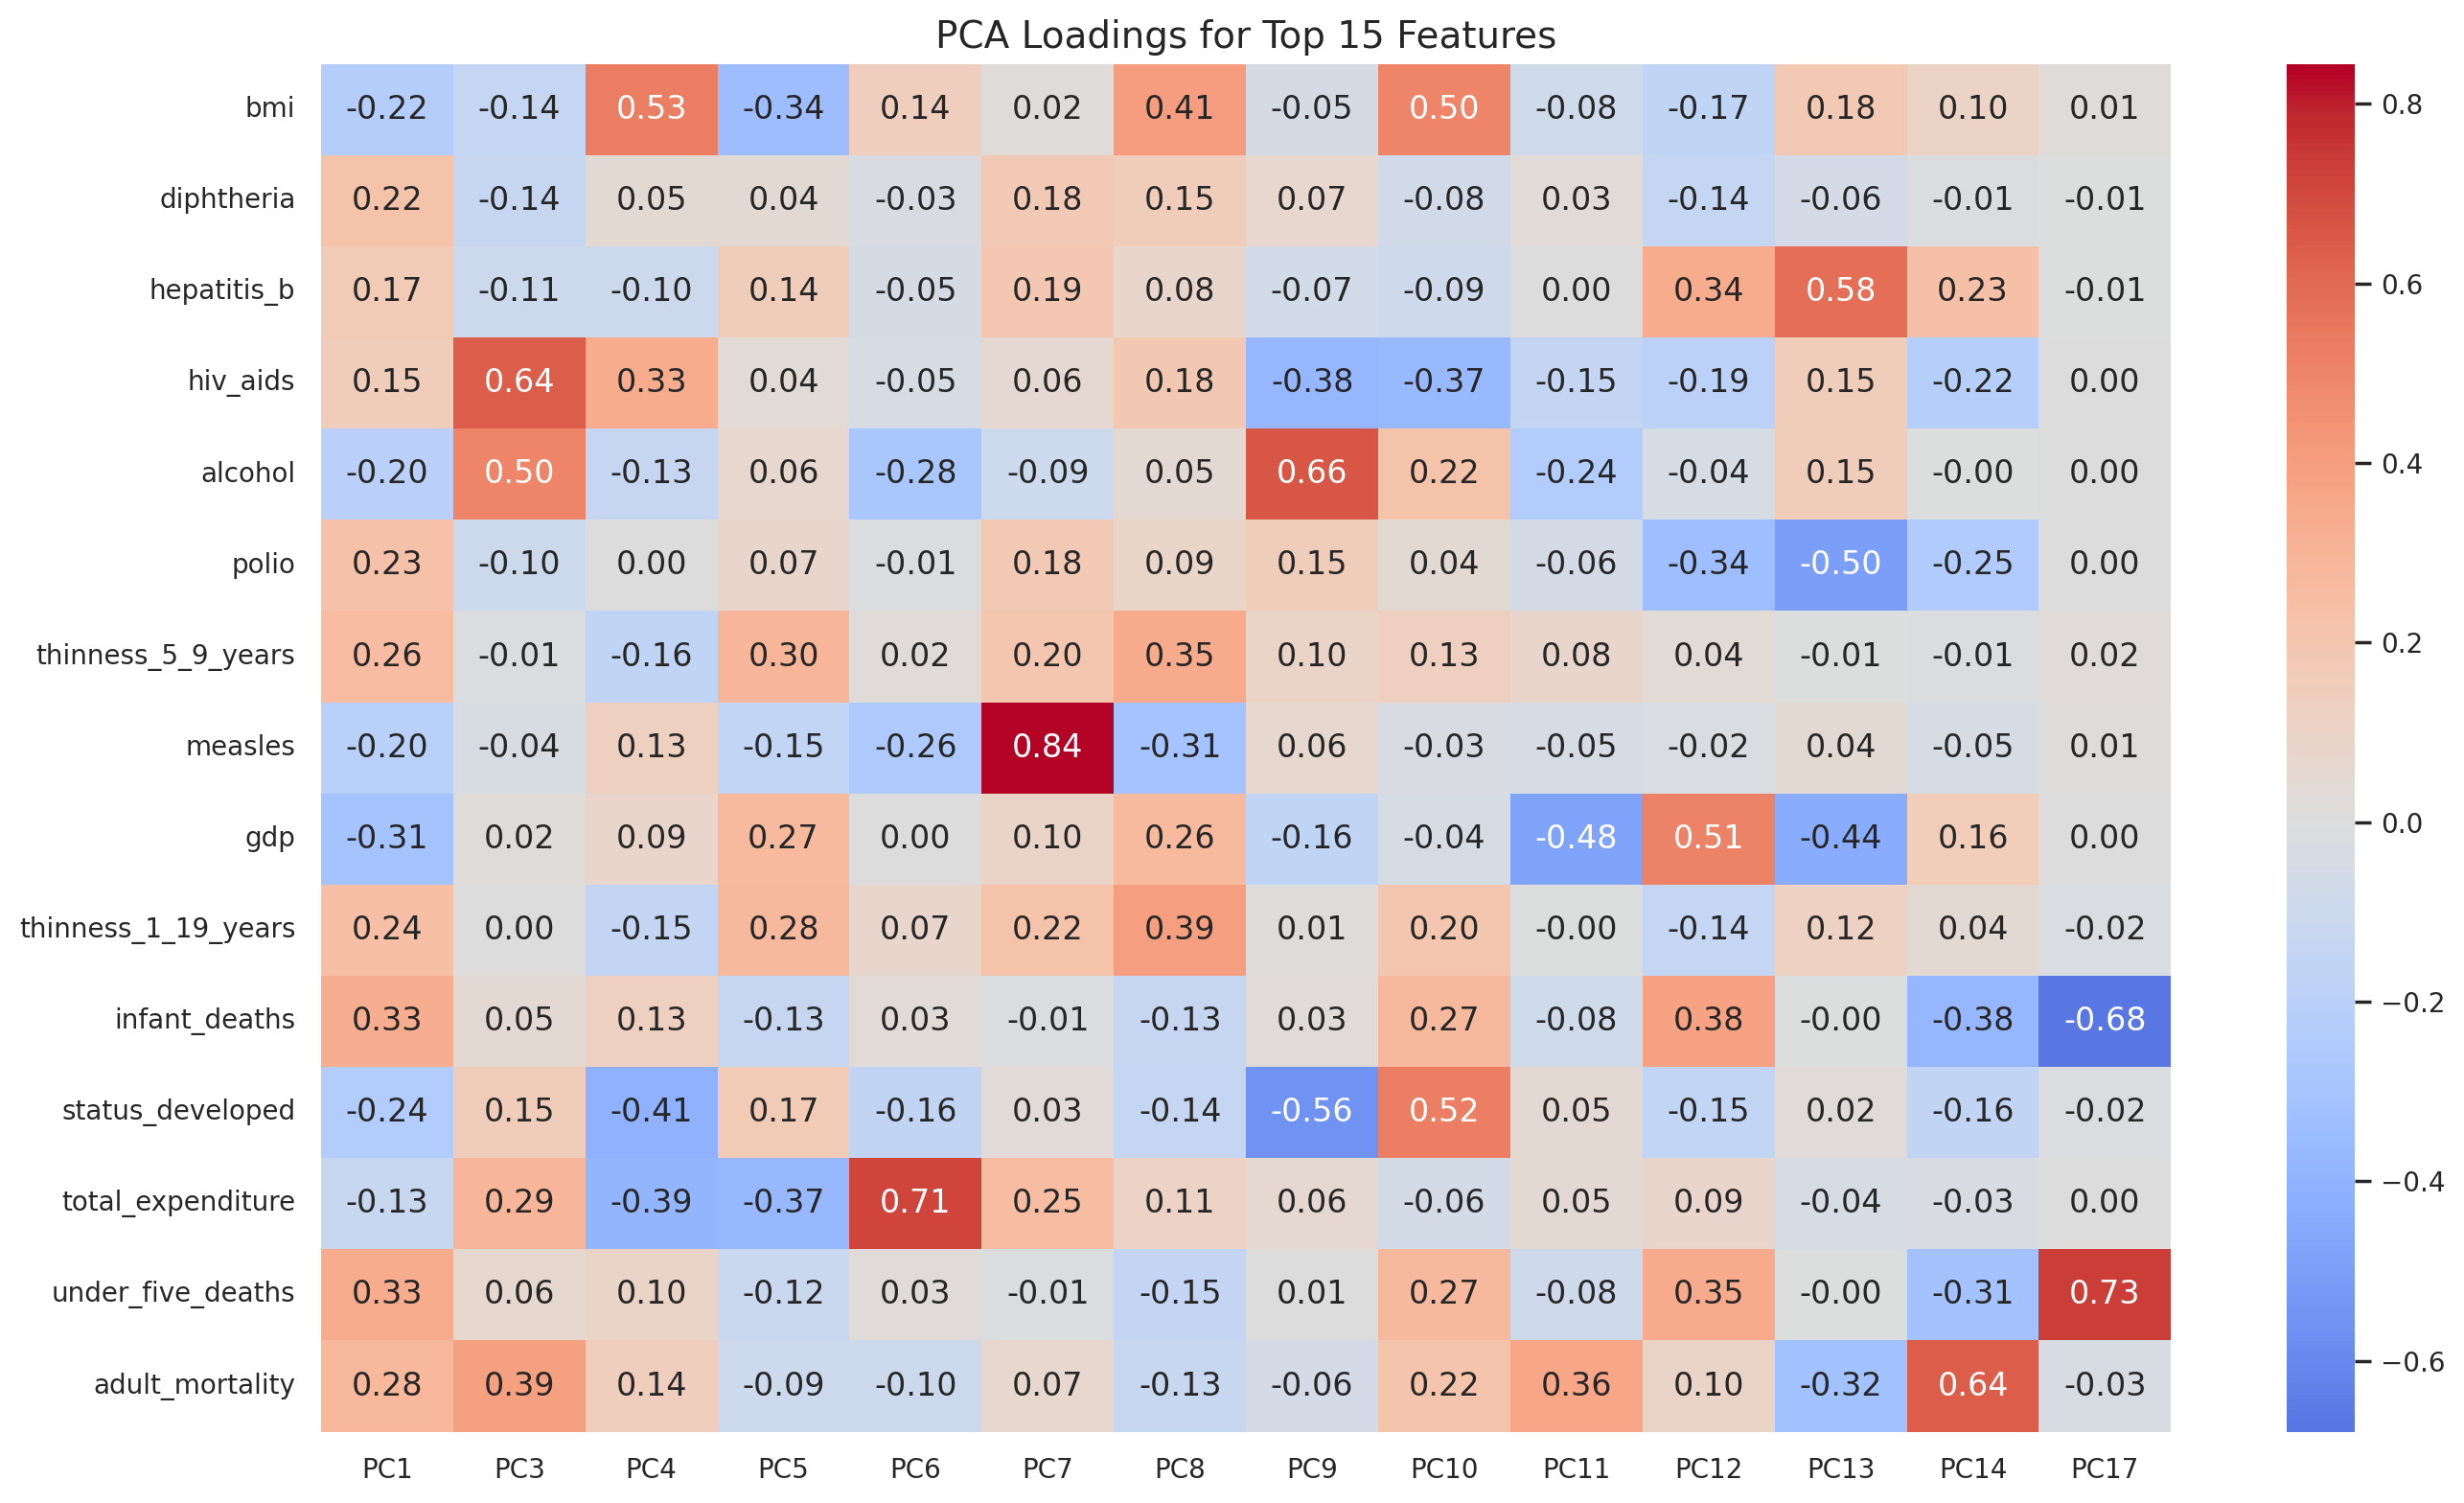

In [19]:
#| label: supervised-pca-loadings
#| fig-cap: Loadings heatmap for retained supervised PCs.
group_res = pca_result.group_results[0]
kept_pcs_prefixed = sig_pcs if sig_pcs else group_res.pc_scores.columns.tolist()
kept_pc_names = [
    pc.split(f"{group_res.group.name}_", 1)[1] for pc in kept_pcs_prefixed
]

plot_loadings_heatmap(
    group_res,
    pc_subset=kept_pc_names,
    top_n_features=15,
    figsize=(14, 8),
).show()

In [20]:
#| label: supervised-pca-biplot
#| fig-cap: Biplot for the first two retained supervised PCs.
pc_axes = kept_pc_names[:2] if len(kept_pc_names) >= 2 else kept_pc_names
if pc_axes:
    biplot_fig = plot_biplot_plotly(
        group_res,
        dims=min(2, len(pc_axes)),
        pc_axes=pc_axes,
        top_features=12,
        color=train_full.loc[group_res.pc_scores.index, LECol.TARGET],
    )
    biplot_fig.show()

In [21]:
#| label: supervised-pca-biplot-2d
#| fig-cap: 2D biplot for supervised PCs 4, 5.
pc_axes_3d = [pc for pc in ["PC4", "PC5"] if pc in kept_pc_names]
biplot_fig_3d = plot_biplot_plotly(
    group_res,
    dims=2,
    pc_axes=pc_axes_3d,
    top_features=10,
    color=train_full.loc[group_res.pc_scores.index, LECol.TARGET],
).show()

In [22]:
#| label: supervised-pca-biplot-3d
#| fig-cap: 3D biplot for supervised PCs 5, 7, 8 (if available).
pc_axes_3d = [pc for pc in ["PC5", "PC7", "PC8"] if pc in kept_pc_names]
if len(pc_axes_3d) == 3:
    biplot_fig_3d = plot_biplot_plotly(
        group_res,
        dims=3,
        pc_axes=pc_axes_3d,
        top_features=10,
        color=train_full.loc[group_res.pc_scores.index, LECol.TARGET],
    )
    biplot_fig_3d.show()